In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

def WL(team, row):
    if team == row[3] and row[9] > row[10]:
        return 1
    elif team == row[3] and row[9] < row[10]:
        return 0
    elif  team == row[6] and row[9] > row[10]:
        return 0
    elif team == row[6] and row[9] < row[10]:
        return 1   
    else:
        return None
class Group2():
    def __init__(self, group_start):
        self.start = group_start
    last_type = 0
    
    def clump(self,x):
        if x != Group.last_type:
            self.start +=1
        
        groupNum = self.start
        #print(groupNum,'hh')
        Group.last_type = x
        return groupNum   
class Group():
    def __init__(self, group_start):
        self.start = group_start
    last_type = 0
    
    def clump(self,x):
        if x != Group.last_type:
            self.start +=1
        
        groupNum = self.start
        #print(groupNum,'hh')
        Group.last_type = x
        return groupNum
def run_season(season_file):
    "*******GET the game by game season by season data and get average clump size*********"
    SeasonDF = pd.read_csv(season_file,
                           header = None)
    #print(SeasonDF.columns)
    print("******")
    SeasonDF =SeasonDF[[3,6,9,10]]
    teamSet = SeasonDF[3].unique()

    
    WinningPerList = []
    AvgClumpL = []
    for i in teamSet:
        print(i)
        TotalGames = 0
        zzz= Group(0)
        WLArray = SeasonDF.apply(lambda x: WL(i, x), axis =1).dropna()
        #remove the second half of the season
        #WLArray =WLArray[int(len(WLArray)/2):]
        Clumps = WLArray.apply(lambda x:zzz.clump(x) )
        zipped =zip(list(Clumps), list(WLArray))
        zipped2 =zip(list(Clumps), list(WLArray))
        #for i in zipped2:
            #print(i)
        WinningPer =WLArray.sum()/float(len(WLArray))
        WinningPerList += [WinningPer]
        
        Wins = WLArray.sum()
        
        TotalGames += len(WLArray)
        
        "**PRINT out summary of actual data data*****"
        #print(len(WinningPerList))

        TotalClumps = list(zipped)[-1][0]
        AvgClumpSize = TotalGames/TotalClumps
        print("AVG Clump Size")
        print(AvgClumpSize)
        #print("AVG Clump size from real games: ", AvgClumpSize)
        AvgClumpL += [AvgClumpSize]
        

    "****Create the randomly generated win loss clumps*********"
    WinningPerList2 = []
    
    AvgClumpL2 = []
    
    for wp in WinningPerList:
        TotalGames2 = 0
        yyy= Group2(0)
        WLArray = []
        for num in range(162):
            randnum = random.random()
            if  randnum < wp:
                WLArray +=[1]
            else:
                WLArray +=[0]

        WLArray = pd.Series(WLArray)

        Clumps2 = WLArray.apply(lambda x:yyy.clump(x) )
        zipped2 =zip(list(Clumps2), list(WLArray))
        zippedPrint = zip(list(Clumps2), list(WLArray))


        WinningPer =WLArray.sum()/float(len(WLArray))
        #print ("Random WP",str(WinningPer)[:5],"Actual wp", str(wp)[:5])   
        WinningPerList2 += [WinningPer]
        Wins = WLArray.sum()
        TotalGames2 += len(WLArray)
        #print(list(zipped))
        "**PRINT out summary of randomly generated data*****"
        TotalClumps2 = list(zipped2)[-1][0]
        AvgClumpSize2 = TotalGames2/TotalClumps2
        #print("AVG Randomly generated clump size: ", AvgClumpSize2)
        AvgClumpL2 += [AvgClumpSize2]
    return [list(AvgClumpL),list(AvgClumpL2), list(WinningPerList),list(WinningPerList2), list(teamSet), [season_file] * len(teamSet)]
        
        
    
import os 
al = []
bl = []
Headers = ["avg_clump_real", "avg_clump_fake", "winning_per_real", "winning_per_fake", "team", "season"]
largeDF = pd.DataFrame(columns=Headers)

for i in os.listdir("C:\\Users\\James\\Documents\\MLB\\Gamelogs"):
        
        if ".TXT" in i  and "TEST" not in i:
            ListOLists = run_season("Gamelogs\\" + i)
            
            Headers = ["avg_clump_real", "avg_clump_fake", "winning_per_real", "winning_per_fake", "team", "season"]
            df = pd.DataFrame(dict(zip(Headers,ListOLists)))
            largeDF = pd.concat([largeDF, df], axis = 0)
            #print (np.array(a).sum()/len(a)), (np.array(a).sum()/len(b))
            #al += a
            #bl += b
largeDF.to_csv("MLB_Data_162_2.csv")            
print(largeDF)

"""print('avg clump size real and random games:')    
print(np.array(al).sum()/len(al))
print(len(al))
print(len(bl))
print(np.array(bl).sum()/len(bl))
print("welchs t test:")
t, p = ttest_ind(al, bl, equal_var=False)
print("t",t)
print("p", p)"""

******
PHI
AVG Clump Size
2.1095890411
CHN
AVG Clump Size
1.94936708861
PIT
AVG Clump Size
2.23188405797
SLN
AVG Clump Size
2.1095890411
MLN
AVG Clump Size
1.87804878049
CIN
AVG Clump Size
1.97435897436
BOS
AVG Clump Size
2.2
WS1
AVG Clump Size
2.13888888889
NYA
AVG Clump Size
2.29850746269
KC1
AVG Clump Size
2.08108108108
DET
AVG Clump Size
2.23188405797
LAN
AVG Clump Size
1.73033707865
CHA
AVG Clump Size
2.16901408451
CLE
AVG Clump Size
2.16901408451
BAL
AVG Clump Size
2.2
SFN
AVG Clump Size
1.925
******
CHA
AVG Clump Size
2.53125
LAA
AVG Clump Size
2.3
KC1
AVG Clump Size
2.03797468354
CLE
AVG Clump Size
2.0125
MIN
AVG Clump Size
2.07792207792
CHN
AVG Clump Size
2.13888888889
PHI
AVG Clump Size
2.40625
SLN
AVG Clump Size
2.0
PIT
AVG Clump Size
1.75
MLN
AVG Clump Size
2.02631578947
CIN
AVG Clump Size
2.36923076923
WS2
AVG Clump Size
2.23611111111
DET
AVG Clump Size
2.28169014085
NYA
AVG Clump Size
2.13157894737
BOS
AVG Clump Size
1.95180722892
SFN
AVG Clump Size
2.02631578947
BAL
AVG 

'print(\'avg clump size real and random games:\')    \nprint(np.array(al).sum()/len(al))\nprint(len(al))\nprint(len(bl))\nprint(np.array(bl).sum()/len(bl))\nprint("welchs t test:")\nt, p = ttest_ind(al, bl, equal_var=False)\nprint("t",t)\nprint("p", p)'

    avg_clump_fake  avg_clump_real               season team  \
0         2.120441        2.109589  Gamelogs\GL1960.TXT  PHI   
1         2.076843        1.949367  Gamelogs\GL1960.TXT  CHN   
2         2.114165        2.231884  Gamelogs\GL1960.TXT  PIT   
3         2.032107        2.109589  Gamelogs\GL1960.TXT  SLN   
4         2.039984        1.878049  Gamelogs\GL1960.TXT  MLN   
5         2.040816        1.974359  Gamelogs\GL1960.TXT  CIN   
6         2.040400        2.200000  Gamelogs\GL1960.TXT  BOS   
7         2.004008        2.138889  Gamelogs\GL1960.TXT  WS1   
8         2.115059        2.298507  Gamelogs\GL1960.TXT  NYA   
9         2.139037        2.081081  Gamelogs\GL1960.TXT  KC1   
10        2.000400        2.231884  Gamelogs\GL1960.TXT  DET   
11        2.004812        1.730337  Gamelogs\GL1960.TXT  LAN   
12        2.050021        2.169014  Gamelogs\GL1960.TXT  CHA   
13        1.999600        2.169014  Gamelogs\GL1960.TXT  CLE   
14        2.066970        2.200000  Game

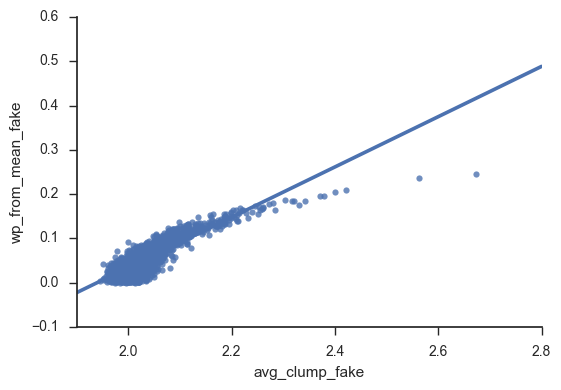

In [4]:
print(largeDF)******
PHI
AVG Clump Size
2.13888888889
CHN
AVG Clump Size
1.67391304348
PIT
AVG Clump Size
2.48387096774
SLN
AVG Clump Size
1.83333333333
MLN
AVG Clump Size
1.75
CIN
AVG Clump Size
2.40625
BOS
AVG Clump Size
2.13888888889
WS1
AVG Clump Size
2.2
NYA
AVG Clump Size
1.97435897436
KC1
AVG Clump Size
2.08108108108
DET
AVG Clump Size
2.48387096774
LAN
AVG Clump Size
1.83333333333
CHA
AVG Clump Size
2.26470588235
CLE
AVG Clump Size
2.02631578947
BAL
AVG Clump Size
2.26470588235
SFN
AVG Clump Size
1.79069767442
******
CHA
AVG Clump Size
2.7
LAA
AVG Clump Size
2.58064516129
KC1
AVG Clump Size
1.9512195122
CLE
AVG Clump Size
1.90476190476
MIN
AVG Clump Size
2.10526315789
CHN
AVG Clump Size
2.33333333333
PHI
AVG Clump Size
2.48387096774
SLN
AVG Clump Size
1.87804878049
PIT
AVG Clump Size
1.75
MLN
AVG Clump Size
1.87804878049
CIN
AVG Clump Size
2.48387096774
WS2
AVG Clump Size
1.9512195122
DET
AVG Clump Size
2.31428571429
NYA
AVG Clump Size
2.25
BOS
AVG Clump Size
1.88372093023
SFN
AVG Clump Size
1.925
BAL
AVG Clump Size
1.92857142857
LAN
AVG Clump Size
1.97435897436
******
DET
AVG Clump Size
1.73913043478
PHI
AVG Clump Size
2.05128205128
CLE
AVG Clump Size
1.72340425532
LAA
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.18918918919
BAL
AVG Clump Size
1.84090909091
CHN
AVG Clump Size
2.13157894737
CIN
AVG Clump Size
2.025
MLN
AVG Clump Size
1.72340425532
NYN
AVG Clump Size
2.75862068966
WS2
AVG Clump Size
2.42424242424
NYA
AVG Clump Size
1.84090909091
CHA
AVG Clump Size
2.025
SLN
AVG Clump Size
2.61290322581
PIT
AVG Clump Size
3.07692307692
HOU
AVG Clump Size
1.9512195122
BOS
AVG Clump Size
1.9512195122
LAN
AVG Clump Size
2.27777777778
KC1
AVG Clump Size
2.13157894737
SFN
AVG Clump Size
2.5625
******
BAL
AVG Clump Size
2.13157894737
PIT
AVG Clump Size
1.84090909091
CHA
AVG Clump Size
1.88372093023
NYA
AVG Clump Size
2.22222222222
BOS
AVG Clump Size
2.16216216216
CLE
AVG Clump Size
2.7
LAN
AVG Clump Size
2.07692307692
SFN
AVG Clump Size
2.025
SLN
AVG Clump Size
2.025
CIN
AVG Clump Size
2.025
MLN
AVG Clump Size
1.9756097561
WS2
AVG Clump Size
2.25
DET
AVG Clump Size
2.13157894737
NYN
AVG Clump Size
2.31428571429
MIN
AVG Clump Size
2.22222222222
PHI
AVG Clump Size
1.88372093023
KC1
AVG Clump Size
2.07692307692
LAA
AVG Clump Size
1.66666666667
CHN
AVG Clump Size
1.92857142857
HOU
AVG Clump Size
2.25
******
LAA
AVG Clump Size
2.45454545455
HOU
AVG Clump Size
1.65306122449
BAL
AVG Clump Size
1.92857142857
MIN
AVG Clump Size
1.76086956522
KC1
AVG Clump Size
2.18918918919
SLN
AVG Clump Size
1.72340425532
NYN
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.62
MLN
AVG Clump Size
1.88372093023
BOS
AVG Clump Size
2.025
CIN
AVG Clump Size
1.76086956522
NYA
AVG Clump Size
2.13157894737
CHA
AVG Clump Size
2.13157894737
PHI
AVG Clump Size
2.13157894737
PIT
AVG Clump Size
1.72340425532
CLE
AVG Clump Size
2.53125
DET
AVG Clump Size
1.9756097561
WS2
AVG Clump Size
1.8
SFN
AVG Clump Size
1.9756097561
LAN
AVG Clump Size
1.9756097561
******
DET
AVG Clump Size
1.9756097561
NYA
AVG Clump Size
1.92857142857
BOS
AVG Clump Size
2.07692307692
SLN
AVG Clump Size
2.22222222222
MLN
AVG Clump Size
1.72340425532
PHI
AVG Clump Size
1.86046511628
LAN
AVG Clump Size
1.58823529412
SFN
AVG Clump Size
1.84090909091
CHA
AVG Clump Size
1.92857142857
CLE
AVG Clump Size
2.38235294118
HOU
AVG Clump Size
2.38235294118
WS2
AVG Clump Size
1.88372093023
CHN
AVG Clump Size
1.5
CIN
AVG Clump Size
2.07692307692
BAL
AVG Clump Size
1.88372093023
NYN
AVG Clump Size
2.38235294118
PIT
AVG Clump Size
2.53125
CAL
AVG Clump Size
1.58823529412
KC1
AVG Clump Size
2.31428571429
MIN
AVG Clump Size
1.88372093023
******
CLE
AVG Clump Size
2.38235294118
BAL
AVG Clump Size
2.35294117647
CAL
AVG Clump Size
2.25
KC1
AVG Clump Size
1.86046511628
DET
AVG Clump Size
1.92857142857
PIT
AVG Clump Size
1.92857142857
HOU
AVG Clump Size
2.025
CHN
AVG Clump Size
2.025
PHI
AVG Clump Size
2.025
NYA
AVG Clump Size
1.75555555556
BOS
AVG Clump Size
1.76086956522
WS2
AVG Clump Size
1.79545454545
ATL
AVG Clump Size
2.13157894737
CIN
AVG Clump Size
2.58064516129
SLN
AVG Clump Size
2.07692307692
LAN
AVG Clump Size
1.92857142857
CHA
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.79310344828
SFN
AVG Clump Size
2.58064516129
NYN
AVG Clump Size
2.0
******
NYA
AVG Clump Size
1.9756097561
LAN
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
1.9756097561
DET
AVG Clump Size
2.31428571429
CLE
AVG Clump Size
1.92857142857
PHI
AVG Clump Size
2.13157894737
ATL
AVG Clump Size
2.25
PIT
AVG Clump Size
1.62
SFN
AVG Clump Size
1.9756097561
CHA
AVG Clump Size
1.88372093023
HOU
AVG Clump Size
2.07692307692
BAL
AVG Clump Size
1.81818181818
BOS
AVG Clump Size
1.92857142857
NYN
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.81818181818
WS2
AVG Clump Size
1.90476190476
CAL
AVG Clump Size
1.9512195122
CIN
AVG Clump Size
2.13157894737
SLN
AVG Clump Size
2.22222222222
KC1
AVG Clump Size
1.77777777778
******
OAK
AVG Clump Size
2.07692307692
CLE
AVG Clump Size
2.35294117647
BOS
AVG Clump Size
2.18918918919
CAL
AVG Clump Size
1.55769230769
MIN
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.88372093023
PIT
AVG Clump Size
2.18918918919
PHI
AVG Clump Size
1.8
NYN
AVG Clump Size
1.58823529412
ATL
AVG Clump Size
1.65306122449
CIN
AVG Clump Size
1.88372093023
CHA
AVG Clump Size
2.025
SLN
AVG Clump Size
2.07692307692
DET
AVG Clump Size
2.18918918919
NYA
AVG Clump Size
1.9756097561
WS2
AVG Clump Size
1.9512195122
BAL
AVG Clump Size
2.18918918919
SFN
AVG Clump Size
1.76086956522
LAN
AVG Clump Size
1.8
HOU
AVG Clump Size
1.92857142857
******
NYA
AVG Clump Size
2.42424242424
SFN
AVG Clump Size
2.07692307692
LAN
AVG Clump Size
1.88372093023
BOS
AVG Clump Size
1.92857142857
SE1
AVG Clump Size
1.88372093023
CLE
AVG Clump Size
2.16216216216
MIN
AVG Clump Size
2.25
CHA
AVG Clump Size
1.8
PHI
AVG Clump Size
2.61290322581
MON
AVG Clump Size
2.13157894737
HOU
AVG Clump Size
3.11538461538
PIT
AVG Clump Size
2.31428571429
WS2
AVG Clump Size
2.38235294118
KCA
AVG Clump Size
2.025
CIN
AVG Clump Size
1.9756097561
SLN
AVG Clump Size
1.65306122449
BAL
AVG Clump Size
2.13157894737
NYN
AVG Clump Size
2.45454545455
DET
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
2.7
CAL
AVG Clump Size
1.76086956522
CHN
AVG Clump Size
2.18918918919
OAK
AVG Clump Size
1.84090909091
******
DET
AVG Clump Size
1.92857142857
MON
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.18918918919
BAL
AVG Clump Size
2.13157894737
OAK
AVG Clump Size
1.9756097561
CAL
AVG Clump Size
1.76086956522
BOS
AVG Clump Size
2.025
CIN
AVG Clump Size
1.9756097561
CHN
AVG Clump Size
2.13157894737
NYN
AVG Clump Size
2.025
ATL
AVG Clump Size
2.18918918919
HOU
AVG Clump Size
2.13157894737
SLN
AVG Clump Size
1.92857142857
MIL
AVG Clump Size
2.79310344828
SDN
AVG Clump Size
1.72340425532
PIT
AVG Clump Size
1.76086956522
CLE
AVG Clump Size
2.18918918919
SFN
AVG Clump Size
1.6875
LAN
AVG Clump Size
2.35294117647
NYA
AVG Clump Size
1.9756097561
CHA
AVG Clump Size
2.025
PHI
AVG Clump Size
2.35294117647
WS2
AVG Clump Size
2.38235294118
KCA
AVG Clump Size
2.13157894737
******
OAK
AVG Clump Size
1.90476190476
ATL
AVG Clump Size
1.92857142857
LAN
AVG Clump Size
1.8
NYA
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.0
CLE
AVG Clump Size
2.25
MIL
AVG Clump Size
1.77777777778
SLN
AVG Clump Size
1.88372093023
MON
AVG Clump Size
1.9512195122
PHI
AVG Clump Size
1.6875
SFN
AVG Clump Size
2.07692307692
WS2
AVG Clump Size
2.54838709677
CHA
AVG Clump Size
2.61290322581
BOS
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.92857142857
DET
AVG Clump Size
1.65306122449
MIN
AVG Clump Size
1.90476190476
PIT
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
2.42424242424
CAL
AVG Clump Size
1.72340425532
CIN
AVG Clump Size
1.88372093023
HOU
AVG Clump Size
1.84090909091
NYN
AVG Clump Size
2.18918918919
BAL
AVG Clump Size
1.83720930233
******
TEX
AVG Clump Size
2.2
MIL
AVG Clump Size
2.16666666667
BOS
AVG Clump Size
1.87804878049
CHA
AVG Clump Size
2.2
MIN
AVG Clump Size
1.97435897436
PHI
AVG Clump Size
2.16666666667
LAN
AVG Clump Size
2.02631578947
SFN
AVG Clump Size
2.2
PIT
AVG Clump Size
2.13888888889
ATL
AVG Clump Size
1.925
MON
AVG Clump Size
2.16666666667
NYA
AVG Clump Size
2.02631578947
CLE
AVG Clump Size
2.22857142857
SLN
AVG Clump Size
2.29411764706
DET
AVG Clump Size
1.95
KCA
AVG Clump Size
2.08108108108
HOU
AVG Clump Size
2.23529411765
NYN
AVG Clump Size
2.10810810811
CHN
AVG Clump Size
2.26470588235
BAL
AVG Clump Size
2.2
CAL
AVG Clump Size
1.79069767442
CIN
AVG Clump Size
2.02631578947
SDN
AVG Clump Size
2.23529411765
OAK
AVG Clump Size
2.48387096774
******
SFN
AVG Clump Size
2.31428571429
MIL
AVG Clump Size
1.9756097561
NYA
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.025
MIN
AVG Clump Size
1.92857142857
HOU
AVG Clump Size
2.025
MON
AVG Clump Size
1.92857142857
PHI
AVG Clump Size
2.025
SLN
AVG Clump Size
2.18918918919
LAN
AVG Clump Size
2.28571428571
DET
AVG Clump Size
2.07692307692
CHA
AVG Clump Size
2.31428571429
CLE
AVG Clump Size
2.025
CIN
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
2.18918918919
TEX
AVG Clump Size
2.07692307692
OAK
AVG Clump Size
1.72340425532
BAL
AVG Clump Size
1.84090909091
ATL
AVG Clump Size
2.10526315789
NYN
AVG Clump Size
2.05128205128
CHN
AVG Clump Size
1.73913043478
CAL
AVG Clump Size
1.9756097561
BOS
AVG Clump Size
1.76086956522
PIT
AVG Clump Size
2.18918918919
******
OAK
AVG Clump Size
1.84090909091
ATL
AVG Clump Size
1.8
DET
AVG Clump Size
1.76086956522
CAL
AVG Clump Size
2.25
MIN
AVG Clump Size
1.55769230769
BOS
AVG Clump Size
2.18918918919
SDN
AVG Clump Size
2.31428571429
HOU
AVG Clump Size
1.9756097561
PIT
AVG Clump Size
1.92857142857
CLE
AVG Clump Size
2.16216216216
NYN
AVG Clump Size
1.88372093023
LAN
AVG Clump Size
2.31428571429
CIN
AVG Clump Size
2.025
TEX
AVG Clump Size
1.68085106383
NYA
AVG Clump Size
1.8
CHA
AVG Clump Size
1.86046511628
PHI
AVG Clump Size
2.13157894737
MIL
AVG Clump Size
1.9756097561
SLN
AVG Clump Size
1.73913043478
MON
AVG Clump Size
2.0
BAL
AVG Clump Size
1.8
SFN
AVG Clump Size
1.76086956522
KCA
AVG Clump Size
1.92857142857
CHN
AVG Clump Size
1.58823529412
******
KCA
AVG Clump Size
2.53125
LAN
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.90476190476
MON
AVG Clump Size
1.9756097561
MIL
AVG Clump Size
2.025
NYA
AVG Clump Size
2.16216216216
CHA
AVG Clump Size
2.05128205128
MIN
AVG Clump Size
2.25714285714
PHI
AVG Clump Size
2.25
BAL
AVG Clump Size
2.02564102564
PIT
AVG Clump Size
2.58064516129
SFN
AVG Clump Size
2.10526315789
BOS
AVG Clump Size
2.05128205128
CLE
AVG Clump Size
2.07894736842
DET
AVG Clump Size
2.02564102564
OAK
AVG Clump Size
2.18918918919
SLN
AVG Clump Size
1.9756097561
NYN
AVG Clump Size
2.25
CIN
AVG Clump Size
2.25
CHN
AVG Clump Size
2.025
SDN
AVG Clump Size
1.58823529412
TEX
AVG Clump Size
2.025
CAL
AVG Clump Size
1.73913043478
HOU
AVG Clump Size
2.22222222222
******
NYA
AVG Clump Size
2.13513513514
HOU
AVG Clump Size
1.92857142857
BOS
AVG Clump Size
1.88372093023
OAK
AVG Clump Size
1.86046511628
KCA
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
1.6875
MON
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
2.25
LAN
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
2.45454545455
DET
AVG Clump Size
1.70212765957
PIT
AVG Clump Size
1.92857142857
SFN
AVG Clump Size
2.25
CLE
AVG Clump Size
1.83720930233
MIL
AVG Clump Size
2.0
CAL
AVG Clump Size
1.92857142857
CHA
AVG Clump Size
2.22222222222
CIN
AVG Clump Size
1.72340425532
NYN
AVG Clump Size
2.45454545455
SDN
AVG Clump Size
1.84090909091
SLN
AVG Clump Size
1.88372093023
PHI
AVG Clump Size
2.25
BAL
AVG Clump Size
2.25
TEX
AVG Clump Size
1.9756097561
******
CAL
AVG Clump Size
1.8
SDN
AVG Clump Size
2.45454545455
TEX
AVG Clump Size
1.6875
CLE
AVG Clump Size
1.9512195122
KCA
AVG Clump Size
1.6875
MIL
AVG Clump Size
1.6875
CHA
AVG Clump Size
1.9756097561
NYN
AVG Clump Size
2.79310344828
SFN
AVG Clump Size
2.25
SLN
AVG Clump Size
1.84090909091
ATL
AVG Clump Size
2.53125
MIN
AVG Clump Size
2.28571428571
MON
AVG Clump Size
2.25
NYA
AVG Clump Size
2.25
DET
AVG Clump Size
2.18918918919
CIN
AVG Clump Size
2.31428571429
CHN
AVG Clump Size
2.61290322581
BOS
AVG Clump Size
2.5
BAL
AVG Clump Size
2.16216216216
SEA
AVG Clump Size
2.13157894737
TOR
AVG Clump Size
2.16216216216
OAK
AVG Clump Size
1.90476190476
HOU
AVG Clump Size
1.84090909091
PHI
AVG Clump Size
2.25
LAN
AVG Clump Size
2.13157894737
PIT
AVG Clump Size
3.0
******
MIN
AVG Clump Size
2.53125
HOU
AVG Clump Size
2.31428571429
OAK
AVG Clump Size
2.45454545455
BOS
AVG Clump Size
2.25
TOR
AVG Clump Size
2.16216216216
BAL
AVG Clump Size
2.28571428571
LAN
AVG Clump Size
2.31428571429
MON
AVG Clump Size
1.84090909091
SLN
AVG Clump Size
2.13157894737
CHN
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
2.07692307692
KCA
AVG Clump Size
2.18918918919
NYA
AVG Clump Size
1.8
SEA
AVG Clump Size
2.35294117647
PIT
AVG Clump Size
1.77777777778
DET
AVG Clump Size
1.9756097561
SFN
AVG Clump Size
2.25
CHA
AVG Clump Size
2.28571428571
MIL
AVG Clump Size
2.18918918919
TEX
AVG Clump Size
2.07692307692
CLE
AVG Clump Size
1.975
CAL
AVG Clump Size
2.13157894737
CIN
AVG Clump Size
1.77777777778
ATL
AVG Clump Size
1.92857142857
NYN
AVG Clump Size
1.8
PHI
AVG Clump Size
2.07692307692
******
CAL
AVG Clump Size
2.45454545455
SFN
AVG Clump Size
2.31428571429
CLE
AVG Clump Size
2.10526315789
TOR
AVG Clump Size
2.53125
MIL
AVG Clump Size
2.10526315789
NYN
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
1.81818181818
CHA
AVG Clump Size
2.13513513514
MIN
AVG Clump Size
2.45454545455
ATL
AVG Clump Size
2.05128205128
MON
AVG Clump Size
2.05128205128
PHI
AVG Clump Size
2.025
BOS
AVG Clump Size
1.66666666667
TEX
AVG Clump Size
1.72340425532
DET
AVG Clump Size
1.90476190476
OAK
AVG Clump Size
2.31428571429
CIN
AVG Clump Size
1.81818181818
LAN
AVG Clump Size
2.31428571429
NYA
AVG Clump Size
1.63265306122
PIT
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
1.76086956522
SLN
AVG Clump Size
1.92857142857
BAL
AVG Clump Size
2.54838709677
KCA
AVG Clump Size
1.92857142857
HOU
AVG Clump Size
1.88372093023
SEA
AVG Clump Size
2.18918918919
******
TOR
AVG Clump Size
2.25
ATL
AVG Clump Size
2.0
BAL
AVG Clump Size
1.8
DET
AVG Clump Size
2.025
BOS
AVG Clump Size
1.86046511628
MIN
AVG Clump Size
1.9512195122
NYA
AVG Clump Size
2.025
LAN
AVG Clump Size
2.13157894737
CHN
AVG Clump Size
1.76086956522
SFN
AVG Clump Size
1.90476190476
PIT
AVG Clump Size
2.025
CLE
AVG Clump Size
1.77777777778
MON
AVG Clump Size
1.84090909091
SEA
AVG Clump Size
1.84090909091
KCA
AVG Clump Size
1.8
PHI
AVG Clump Size
1.9756097561
MIL
AVG Clump Size
1.9756097561
CIN
AVG Clump Size
1.92857142857
NYN
AVG Clump Size
1.9756097561
HOU
AVG Clump Size
1.9756097561
SLN
AVG Clump Size
1.9756097561
SDN
AVG Clump Size
2.25
CHA
AVG Clump Size
2.0
TEX
AVG Clump Size
1.6
CAL
AVG Clump Size
2.5
OAK
AVG Clump Size
2.13157894737
******
PHI
AVG Clump Size
2.20833333333
TOR
AVG Clump Size
2.52380952381
OAK
AVG Clump Size
3.375
TEX
AVG Clump Size
1.92592592593
CAL
AVG Clump Size
1.71875
NYN
AVG Clump Size
2.04
HOU
AVG Clump Size
1.96428571429
MON
AVG Clump Size
1.86206896552
SDN
AVG Clump Size
1.96428571429
KCA
AVG Clump Size
1.88888888889
CHA
AVG Clump Size
1.96296296296
CIN
AVG Clump Size
2.25
MIL
AVG Clump Size
2.34782608696
BAL
AVG Clump Size
2.16666666667
NYA
AVG Clump Size
2.30434782609
ATL
AVG Clump Size
2.52380952381
PIT
AVG Clump Size
1.82142857143
LAN
AVG Clump Size
2.29166666667
DET
AVG Clump Size
2.45454545455
MIN
AVG Clump Size
2.34782608696
CLE
AVG Clump Size
1.75862068966
CHN
AVG Clump Size
2.68421052632
SLN
AVG Clump Size
1.7
BOS
AVG Clump Size
1.92857142857
SEA
AVG Clump Size
1.92857142857
SFN
AVG Clump Size
1.66666666667
******
KCA
AVG Clump Size
1.76086956522
CHN
AVG Clump Size
2.53125
SEA
AVG Clump Size
1.84090909091
CAL
AVG Clump Size
2.25
SLN
AVG Clump Size
2.07692307692
SFN
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
2.025
NYN
AVG Clump Size
1.76086956522
DET
AVG Clump Size
2.38235294118
MIL
AVG Clump Size
2.07692307692
HOU
AVG Clump Size
1.6875
SDN
AVG Clump Size
1.92857142857
MON
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
2.07692307692
TEX
AVG Clump Size
1.9756097561
PIT
AVG Clump Size
1.9756097561
CHA
AVG Clump Size
2.13157894737
NYA
AVG Clump Size
2.18918918919
LAN
AVG Clump Size
1.92857142857
BAL
AVG Clump Size
1.76086956522
OAK
AVG Clump Size
2.025
PHI
AVG Clump Size
2.25
TOR
AVG Clump Size
1.65306122449
MIN
AVG Clump Size
2.53125
CIN
AVG Clump Size
2.025
CLE
AVG Clump Size
2.13157894737
******
KCA
AVG Clump Size
1.65306122449
CLE
AVG Clump Size
2.07692307692
CHA
AVG Clump Size
1.88372093023
ATL
AVG Clump Size
2.025
TOR
AVG Clump Size
1.76086956522
MIL
AVG Clump Size
1.84090909091
DET
AVG Clump Size
2.13157894737
NYA
AVG Clump Size
1.84090909091
LAN
AVG Clump Size
1.84090909091
PHI
AVG Clump Size
2.31428571429
SDN
AVG Clump Size
1.92857142857
PIT
AVG Clump Size
2.18918918919
MON
AVG Clump Size
1.88372093023
CAL
AVG Clump Size
1.72340425532
MIN
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
1.8
CHN
AVG Clump Size
2.025
BAL
AVG Clump Size
2.025
SLN
AVG Clump Size
2.25
SEA
AVG Clump Size
1.92857142857
HOU
AVG Clump Size
2.25
TEX
AVG Clump Size
1.88372093023
CIN
AVG Clump Size
1.76086956522
NYN
AVG Clump Size
2.025
SFN
AVG Clump Size
1.84090909091
OAK
AVG Clump Size
2.13157894737
******
CHA
AVG Clump Size
2.18918918919
BOS
AVG Clump Size
2.13157894737
NYN
AVG Clump Size
2.25
NYA
AVG Clump Size
2.025
DET
AVG Clump Size
2.7
MIL
AVG Clump Size
2.10526315789
CLE
AVG Clump Size
2.18918918919
PHI
AVG Clump Size
2.07692307692
MON
AVG Clump Size
1.86046511628
SLN
AVG Clump Size
2.18918918919
PIT
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
1.9512195122
TOR
AVG Clump Size
2.25
BAL
AVG Clump Size
1.84090909091
KCA
AVG Clump Size
2.18918918919
TEX
AVG Clump Size
2.10526315789
MIN
AVG Clump Size
1.9756097561
HOU
AVG Clump Size
1.88372093023
CAL
AVG Clump Size
1.92857142857
ATL
AVG Clump Size
2.25
SEA
AVG Clump Size
1.92857142857
CIN
AVG Clump Size
2.31428571429
SFN
AVG Clump Size
2.31428571429
OAK
AVG Clump Size
1.8
LAN
AVG Clump Size
2.07692307692
SDN
AVG Clump Size
2.18918918919
******
TEX
AVG Clump Size
2.0
NYA
AVG Clump Size
2.16216216216
CLE
AVG Clump Size
2.38235294118
TOR
AVG Clump Size
2.16216216216
MON
AVG Clump Size
2.22222222222
MIN
AVG Clump Size
2.61290322581
CHA
AVG Clump Size
2.07692307692
OAK
AVG Clump Size
1.92857142857
PIT
AVG Clump Size
1.90476190476
LAN
AVG Clump Size
1.72340425532
SLN
AVG Clump Size
2.13157894737
ATL
AVG Clump Size
1.8
SDN
AVG Clump Size
1.88372093023
CAL
AVG Clump Size
1.92857142857
MIL
AVG Clump Size
2.05128205128
PHI
AVG Clump Size
2.18918918919
SFN
AVG Clump Size
2.07692307692
CIN
AVG Clump Size
1.90476190476
DET
AVG Clump Size
2.05128205128
SEA
AVG Clump Size
2.61290322581
HOU
AVG Clump Size
1.6875
NYN
AVG Clump Size
2.31428571429
BAL
AVG Clump Size
2.0
BOS
AVG Clump Size
2.38235294118
KCA
AVG Clump Size
2.31428571429
CHN
AVG Clump Size
2.10526315789
******
CLE
AVG Clump Size
2.53125
MIL
AVG Clump Size
2.16216216216
BOS
AVG Clump Size
2.28571428571
PHI
AVG Clump Size
1.81818181818
SDN
AVG Clump Size
1.6875
KCA
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.13157894737
CAL
AVG Clump Size
1.8
TOR
AVG Clump Size
1.72340425532
MON
AVG Clump Size
2.0
SFN
AVG Clump Size
1.92857142857
NYN
AVG Clump Size
2.61290322581
CHN
AVG Clump Size
1.73913043478
DET
AVG Clump Size
1.9756097561
SEA
AVG Clump Size
2.025
BAL
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.86046511628
CIN
AVG Clump Size
1.9756097561
TEX
AVG Clump Size
2.18918918919
OAK
AVG Clump Size
2.7
SLN
AVG Clump Size
2.5
PIT
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
2.18918918919
NYA
AVG Clump Size
2.25
HOU
AVG Clump Size
1.9756097561
CHA
AVG Clump Size
2.45454545455
******
TEX
AVG Clump Size
2.25
NYA
AVG Clump Size
1.88372093023
CHA
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
2.13157894737
CLE
AVG Clump Size
1.9756097561
MON
AVG Clump Size
1.92857142857
LAN
AVG Clump Size
2.18918918919
SDN
AVG Clump Size
2.38235294118
SEA
AVG Clump Size
1.76086956522
OAK
AVG Clump Size
1.88372093023
PHI
AVG Clump Size
1.92857142857
SLN
AVG Clump Size
2.025
PIT
AVG Clump Size
1.9756097561
SFN
AVG Clump Size
1.88372093023
TOR
AVG Clump Size
2.025
DET
AVG Clump Size
2.25
BAL
AVG Clump Size
2.61290322581
CAL
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
1.88372093023
MIL
AVG Clump Size
2.79310344828
ATL
AVG Clump Size
1.90476190476
CHN
AVG Clump Size
1.77777777778
CIN
AVG Clump Size
2.025
HOU
AVG Clump Size
2.13157894737
NYN
AVG Clump Size
2.13157894737
KCA
AVG Clump Size
1.9756097561
******
MIL
AVG Clump Size
3.0
DET
AVG Clump Size
1.72340425532
CAL
AVG Clump Size
2.25
TOR
AVG Clump Size
2.07692307692
SEA
AVG Clump Size
1.90476190476
CLE
AVG Clump Size
2.25
SLN
AVG Clump Size
1.92857142857
SFN
AVG Clump Size
1.65306122449
NYN
AVG Clump Size
2.22222222222
MIN
AVG Clump Size
2.13157894737
CHN
AVG Clump Size
1.8
SDN
AVG Clump Size
2.05128205128
PIT
AVG Clump Size
2.05128205128
LAN
AVG Clump Size
1.9512195122
OAK
AVG Clump Size
2.89285714286
BAL
AVG Clump Size
2.16216216216
BOS
AVG Clump Size
2.025
HOU
AVG Clump Size
2.025
NYA
AVG Clump Size
1.9512195122
PHI
AVG Clump Size
1.86046511628
CIN
AVG Clump Size
1.77777777778
KCA
AVG Clump Size
2.5
CHA
AVG Clump Size
1.73913043478
TEX
AVG Clump Size
2.05128205128
MON
AVG Clump Size
1.88372093023
ATL
AVG Clump Size
2.0
******
BOS
AVG Clump Size
1.9756097561
MIL
AVG Clump Size
1.76086956522
TOR
AVG Clump Size
1.92857142857
SEA
AVG Clump Size
1.6875
LAN
AVG Clump Size
2.10526315789
SLN
AVG Clump Size
2.25
SFN
AVG Clump Size
2.025
CHA
AVG Clump Size
2.05128205128
NYA
AVG Clump Size
1.81818181818
DET
AVG Clump Size
2.13157894737
PHI
AVG Clump Size
2.07692307692
ATL
AVG Clump Size
2.35294117647
PIT
AVG Clump Size
2.13157894737
BAL
AVG Clump Size
2.13157894737
CLE
AVG Clump Size
2.13157894737
SDN
AVG Clump Size
2.07692307692
NYN
AVG Clump Size
1.92857142857
OAK
AVG Clump Size
1.8
TEX
AVG Clump Size
2.07692307692
CIN
AVG Clump Size
1.84090909091
MON
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.38235294118
HOU
AVG Clump Size
2.18918918919
CAL
AVG Clump Size
2.31428571429
KCA
AVG Clump Size
2.13157894737
CHN
AVG Clump Size
2.38235294118
******
DET
AVG Clump Size
1.88372093023
SEA
AVG Clump Size
1.6875
MIL
AVG Clump Size
2.025
BAL
AVG Clump Size
1.86046511628
MIN
AVG Clump Size
2.25
TOR
AVG Clump Size
2.31428571429
CIN
AVG Clump Size
2.25
SDN
AVG Clump Size
2.07692307692
PIT
AVG Clump Size
2.18918918919
MON
AVG Clump Size
2.025
CHA
AVG Clump Size
2.25
TEX
AVG Clump Size
1.92857142857
PHI
AVG Clump Size
1.8
LAN
AVG Clump Size
2.07692307692
SFN
AVG Clump Size
2.25
BOS
AVG Clump Size
1.88372093023
CLE
AVG Clump Size
1.8
OAK
AVG Clump Size
2.18918918919
NYN
AVG Clump Size
2.25
SLN
AVG Clump Size
1.72340425532
CHN
AVG Clump Size
2.38235294118
NYA
AVG Clump Size
2.31428571429
ATL
AVG Clump Size
2.025
HOU
AVG Clump Size
2.53125
CAL
AVG Clump Size
1.92857142857
KCA
AVG Clump Size
2.05128205128
******
CHA
AVG Clump Size
1.9756097561
NYA
AVG Clump Size
2.18918918919
CLE
AVG Clump Size
1.9756097561
MIL
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
2.31428571429
HOU
AVG Clump Size
1.8
PHI
AVG Clump Size
2.18918918919
MON
AVG Clump Size
2.96296296296
MIN
AVG Clump Size
2.61290322581
CAL
AVG Clump Size
1.92857142857
SLN
AVG Clump Size
1.8
SFN
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
1.72340425532
SEA
AVG Clump Size
2.7
BAL
AVG Clump Size
2.025
PIT
AVG Clump Size
2.45454545455
SDN
AVG Clump Size
2.13157894737
ATL
AVG Clump Size
1.84090909091
OAK
AVG Clump Size
2.025
TOR
AVG Clump Size
1.84090909091
NYN
AVG Clump Size
1.81818181818
CIN
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.07692307692
TEX
AVG Clump Size
2.7
DET
AVG Clump Size
2.13157894737
CHN
AVG Clump Size
2.35294117647
******
CLE
AVG Clump Size
1.88372093023
TOR
AVG Clump Size
2.18918918919
MIN
AVG Clump Size
2.13157894737
KCA
AVG Clump Size
2.38235294118
TEX
AVG Clump Size
1.9756097561
SDN
AVG Clump Size
1.84090909091
SFN
AVG Clump Size
2.07692307692
MON
AVG Clump Size
1.92857142857
NYN
AVG Clump Size
1.9756097561
CHA
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
1.76086956522
ATL
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.84090909091
CIN
AVG Clump Size
2.31428571429
LAN
AVG Clump Size
2.18918918919
MIL
AVG Clump Size
2.18918918919
NYA
AVG Clump Size
2.18918918919
BAL
AVG Clump Size
1.88372093023
SLN
AVG Clump Size
1.84090909091
PIT
AVG Clump Size
2.31428571429
SEA
AVG Clump Size
2.45454545455
DET
AVG Clump Size
2.07692307692
OAK
AVG Clump Size
2.07692307692
CAL
AVG Clump Size
2.45454545455
PHI
AVG Clump Size
1.62
HOU
AVG Clump Size
1.9756097561
******
TEX
AVG Clump Size
1.9756097561
NYA
AVG Clump Size
1.72340425532
BOS
AVG Clump Size
2.31428571429
DET
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.72340425532
MON
AVG Clump Size
1.88372093023
LAN
AVG Clump Size
2.31428571429
PHI
AVG Clump Size
2.18918918919
COL
AVG Clump Size
2.025
MIL
AVG Clump Size
1.84090909091
CHA
AVG Clump Size
2.13157894737
TOR
AVG Clump Size
2.13157894737
SDN
AVG Clump Size
1.88372093023
SFN
AVG Clump Size
2.07692307692
MIN
AVG Clump Size
2.025
BAL
AVG Clump Size
2.025
CLE
AVG Clump Size
2.13157894737
HOU
AVG Clump Size
2.38235294118
CHN
AVG Clump Size
1.55769230769
CIN
AVG Clump Size
1.9756097561
CAL
AVG Clump Size
1.6875
KCA
AVG Clump Size
1.65306122449
PIT
AVG Clump Size
2.13157894737
FLO
AVG Clump Size
1.6875
OAK
AVG Clump Size
1.92857142857
SEA
AVG Clump Size
1.62
NYN
AVG Clump Size
1.9756097561
SLN
AVG Clump Size
1.76086956522
******
SLN
AVG Clump Size
1.67647058824
KCA
AVG Clump Size
1.72727272727
DET
AVG Clump Size
1.96551724138
SEA
AVG Clump Size
2.15384615385
TEX
AVG Clump Size
1.67647058824
CHA
AVG Clump Size
1.93103448276
NYN
AVG Clump Size
1.75
PHI
AVG Clump Size
2.11111111111
MON
AVG Clump Size
1.96551724138
ATL
AVG Clump Size
2.28
PIT
AVG Clump Size
2.375
OAK
AVG Clump Size
3.16666666667
CAL
AVG Clump Size
2.47826086957
FLO
AVG Clump Size
1.78125
BOS
AVG Clump Size
2.19230769231
CLE
AVG Clump Size
2.15384615385
CHN
AVG Clump Size
2.8
COL
AVG Clump Size
1.93333333333
BAL
AVG Clump Size
1.8064516129
TOR
AVG Clump Size
2.19230769231
MIN
AVG Clump Size
2.07407407407
MIL
AVG Clump Size
2.28
CIN
AVG Clump Size
2.28
NYA
AVG Clump Size
2.33333333333
SFN
AVG Clump Size
1.96551724138
HOU
AVG Clump Size
1.62857142857
SDN
AVG Clump Size
3.625
LAN
AVG Clump Size
1.9
******
LAN
AVG Clump Size
2.76923076923
MIN
AVG Clump Size
1.84615384615
DET
AVG Clump Size
2.11764705882
BAL
AVG Clump Size
2.32258064516
CHA
AVG Clump Size
2.11764705882
TEX
AVG Clump Size
1.8
OAK
AVG Clump Size
1.89473684211
SFN
AVG Clump Size
2.05714285714
CHN
AVG Clump Size
1.89473684211
NYN
AVG Clump Size
2.0
MON
AVG Clump Size
2.32258064516
HOU
AVG Clump Size
2.32258064516
PHI
AVG Clump Size
2.25
MIL
AVG Clump Size
2.05714285714
CLE
AVG Clump Size
2.05714285714
NYA
AVG Clump Size
2.0
CAL
AVG Clump Size
1.6
COL
AVG Clump Size
2.25
ATL
AVG Clump Size
2.76923076923
SLN
AVG Clump Size
1.86842105263
PIT
AVG Clump Size
1.94594594595
CIN
AVG Clump Size
2.4
FLO
AVG Clump Size
2.02857142857
BOS
AVG Clump Size
1.94594594595
SEA
AVG Clump Size
1.75609756098
SDN
AVG Clump Size
2.18181818182
KCA
AVG Clump Size
2.0
TOR
AVG Clump Size
1.75609756098
******
CHA
AVG Clump Size
2.25
DET
AVG Clump Size
2.53125
TOR
AVG Clump Size
2.025
BOS
AVG Clump Size
2.025
SFN
AVG Clump Size
2.31428571429
SDN
AVG Clump Size
2.025
PIT
AVG Clump Size
1.84090909091
LAN
AVG Clump Size
1.76086956522
SLN
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.22222222222
MIL
AVG Clump Size
1.88372093023
NYA
AVG Clump Size
1.84090909091
MON
AVG Clump Size
2.18918918919
COL
AVG Clump Size
2.38235294118
BAL
AVG Clump Size
2.13157894737
CIN
AVG Clump Size
2.53125
NYN
AVG Clump Size
1.6875
CHN
AVG Clump Size
1.84090909091
ATL
AVG Clump Size
1.8
PHI
AVG Clump Size
2.025
FLO
AVG Clump Size
2.31428571429
MIN
AVG Clump Size
1.92857142857
TEX
AVG Clump Size
2.07692307692
SEA
AVG Clump Size
1.70212765957
OAK
AVG Clump Size
1.92857142857
CAL
AVG Clump Size
2.5
CLE
AVG Clump Size
2.05128205128
HOU
AVG Clump Size
1.92857142857
******
COL
AVG Clump Size
1.6875
CHN
AVG Clump Size
2.18918918919
ATL
AVG Clump Size
2.31428571429
PHI
AVG Clump Size
2.13157894737
SLN
AVG Clump Size
2.07692307692
NYN
AVG Clump Size
1.8
PIT
AVG Clump Size
1.88372093023
DET
AVG Clump Size
1.88372093023
NYA
AVG Clump Size
1.92857142857
MIL
AVG Clump Size
2.66666666667
CHA
AVG Clump Size
2.0
BOS
AVG Clump Size
2.07692307692
KCA
AVG Clump Size
1.9512195122
CLE
AVG Clump Size
1.70212765957
CIN
AVG Clump Size
1.84090909091
BAL
AVG Clump Size
2.38235294118
MIN
AVG Clump Size
1.88372093023
TEX
AVG Clump Size
1.65306122449
HOU
AVG Clump Size
1.62
FLO
AVG Clump Size
1.9756097561
MON
AVG Clump Size
2.18918918919
TOR
AVG Clump Size
2.13157894737
SDN
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
1.8
SEA
AVG Clump Size
1.84090909091
ANA
AVG Clump Size
2.31428571429
OAK
AVG Clump Size
1.8
SFN
AVG Clump Size
1.88372093023
******
KCA
AVG Clump Size
1.86046511628
CLE
AVG Clump Size
2.31428571429
DET
AVG Clump Size
2.18918918919
CHA
AVG Clump Size
1.6875
COL
AVG Clump Size
2.18918918919
MIL
AVG Clump Size
2.18918918919
SDN
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
2.38235294118
SFN
AVG Clump Size
2.31428571429
PHI
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
1.92857142857
NYA
AVG Clump Size
2.79310344828
BOS
AVG Clump Size
2.38235294118
MIN
AVG Clump Size
1.65306122449
PIT
AVG Clump Size
1.92857142857
TEX
AVG Clump Size
2.38235294118
MON
AVG Clump Size
2.13157894737
TBA
AVG Clump Size
2.025
BAL
AVG Clump Size
2.13157894737
TOR
AVG Clump Size
1.76086956522
NYN
AVG Clump Size
1.92857142857
SLN
AVG Clump Size
2.025
ARI
AVG Clump Size
2.38235294118
FLO
AVG Clump Size
2.07692307692
ATL
AVG Clump Size
2.38235294118
CIN
AVG Clump Size
2.13157894737
HOU
AVG Clump Size
1.84090909091
SEA
AVG Clump Size
2.05128205128
ANA
AVG Clump Size
2.18918918919
OAK
AVG Clump Size
1.76086956522
******
COL
AVG Clump Size
2.025
TBA
AVG Clump Size
2.07692307692
BOS
AVG Clump Size
2.07692307692
NYA
AVG Clump Size
2.25
CHA
AVG Clump Size
1.77777777778
DET
AVG Clump Size
1.73913043478
PHI
AVG Clump Size
1.84090909091
SFN
AVG Clump Size
2.07692307692
NYN
AVG Clump Size
2.31428571429
ARI
AVG Clump Size
1.92857142857
MON
AVG Clump Size
2.18918918919
MIL
AVG Clump Size
1.81818181818
CLE
AVG Clump Size
1.88372093023
TOR
AVG Clump Size
1.9756097561
CHN
AVG Clump Size
1.9756097561
SDN
AVG Clump Size
1.88372093023
KCA
AVG Clump Size
2.16216216216
OAK
AVG Clump Size
2.25
ANA
AVG Clump Size
1.92857142857
CIN
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
2.10526315789
LAN
AVG Clump Size
1.84090909091
FLO
AVG Clump Size
2.18918918919
ATL
AVG Clump Size
2.025
BAL
AVG Clump Size
2.38235294118
TEX
AVG Clump Size
1.9756097561
SLN
AVG Clump Size
1.77777777778
HOU
AVG Clump Size
2.025
SEA
AVG Clump Size
2.13157894737
PIT
AVG Clump Size
2.28571428571
******
CHN
AVG Clump Size
1.88372093023
NYN
AVG Clump Size
2.07692307692
COL
AVG Clump Size
1.92857142857
MIL
AVG Clump Size
1.72340425532
SFN
AVG Clump Size
2.38235294118
LAN
AVG Clump Size
2.18918918919
SDN
AVG Clump Size
2.13157894737
NYA
AVG Clump Size
1.9512195122
CLE
AVG Clump Size
2.13157894737
TBA
AVG Clump Size
1.9512195122
DET
AVG Clump Size
1.92857142857
CHA
AVG Clump Size
2.31428571429
KCA
AVG Clump Size
2.13157894737
PHI
AVG Clump Size
2.025
HOU
AVG Clump Size
1.92857142857
BOS
AVG Clump Size
2.13157894737
PIT
AVG Clump Size
1.8
MIN
AVG Clump Size
2.31428571429
TOR
AVG Clump Size
1.72340425532
ATL
AVG Clump Size
1.8
CIN
AVG Clump Size
1.76086956522
SLN
AVG Clump Size
2.07692307692
FLO
AVG Clump Size
1.9512195122
ARI
AVG Clump Size
2.31428571429
MON
AVG Clump Size
2.07692307692
SEA
AVG Clump Size
1.72340425532
BAL
AVG Clump Size
3.0
TEX
AVG Clump Size
2.025
OAK
AVG Clump Size
2.0
ANA
AVG Clump Size
1.58823529412
******
TEX
AVG Clump Size
1.76086956522
BOS
AVG Clump Size
1.86046511628
CHA
AVG Clump Size
2.53125
KCA
AVG Clump Size
2.31428571429
OAK
AVG Clump Size
1.88372093023
MON
AVG Clump Size
2.13157894737
ATL
AVG Clump Size
1.58823529412
SLN
AVG Clump Size
2.53125
PHI
AVG Clump Size
2.31428571429
MIL
AVG Clump Size
1.92857142857
SDN
AVG Clump Size
2.61290322581
MIN
AVG Clump Size
1.9756097561
TOR
AVG Clump Size
1.8
ANA
AVG Clump Size
1.84090909091
NYN
AVG Clump Size
1.88372093023
PIT
AVG Clump Size
2.38235294118
ARI
AVG Clump Size
2.25
TBA
AVG Clump Size
2.31428571429
DET
AVG Clump Size
3.0
BAL
AVG Clump Size
1.77777777778
SEA
AVG Clump Size
2.61290322581
SFN
AVG Clump Size
2.025
CIN
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
2.45454545455
CLE
AVG Clump Size
2.07692307692
NYA
AVG Clump Size
1.9512195122
FLO
AVG Clump Size
1.8
COL
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
2.18918918919
HOU
AVG Clump Size
2.25
******
CLE
AVG Clump Size
2.18918918919
NYA
AVG Clump Size
2.22222222222
TOR
AVG Clump Size
2.7
MIN
AVG Clump Size
1.86046511628
TEX
AVG Clump Size
2.53125
CHA
AVG Clump Size
2.025
SDN
AVG Clump Size
2.025
PHI
AVG Clump Size
1.90476190476
CHN
AVG Clump Size
1.9756097561
PIT
AVG Clump Size
1.86046511628
COL
AVG Clump Size
2.31428571429
DET
AVG Clump Size
2.5
MIL
AVG Clump Size
2.53125
SFN
AVG Clump Size
1.90476190476
FLO
AVG Clump Size
1.6875
BOS
AVG Clump Size
2.45454545455
TBA
AVG Clump Size
2.42424242424
OAK
AVG Clump Size
2.31428571429
ANA
AVG Clump Size
2.18918918919
NYN
AVG Clump Size
2.0
MON
AVG Clump Size
2.13157894737
SLN
AVG Clump Size
2.07692307692
ARI
AVG Clump Size
1.88372093023
SEA
AVG Clump Size
2.25
HOU
AVG Clump Size
2.07692307692
ATL
AVG Clump Size
2.22222222222
CIN
AVG Clump Size
2.025
KCA
AVG Clump Size
1.8
LAN
AVG Clump Size
1.84090909091
BAL
AVG Clump Size
1.62
******
TEX
AVG Clump Size
2.18918918919
CLE
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
2.45454545455
CHA
AVG Clump Size
1.92857142857
BOS
AVG Clump Size
1.76086956522
NYA
AVG Clump Size
2.31428571429
LAN
AVG Clump Size
2.31428571429
MON
AVG Clump Size
2.18918918919
PIT
AVG Clump Size
2.38235294118
PHI
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
1.55769230769
SFN
AVG Clump Size
2.22222222222
MIL
AVG Clump Size
2.13157894737
SEA
AVG Clump Size
2.18918918919
COL
AVG Clump Size
2.18918918919
DET
AVG Clump Size
3.24
TOR
AVG Clump Size
2.31428571429
ANA
AVG Clump Size
1.88372093023
FLO
AVG Clump Size
1.88372093023
ARI
AVG Clump Size
1.88372093023
HOU
AVG Clump Size
2.18918918919
SDN
AVG Clump Size
2.13157894737
BAL
AVG Clump Size
2.18918918919
OAK
AVG Clump Size
1.88372093023
SLN
AVG Clump Size
2.025
NYN
AVG Clump Size
2.0
CIN
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.18918918919
TBA
AVG Clump Size
2.025
******
NYA
AVG Clump Size
2.13157894737
BOS
AVG Clump Size
1.9756097561
CHN
AVG Clump Size
1.92857142857
SFN
AVG Clump Size
2.07692307692
SDN
AVG Clump Size
1.8
PHI
AVG Clump Size
1.6875
MIL
AVG Clump Size
1.73913043478
CHA
AVG Clump Size
1.6875
CLE
AVG Clump Size
2.07692307692
TEX
AVG Clump Size
2.025
DET
AVG Clump Size
1.84090909091
COL
AVG Clump Size
2.18918918919
NYN
AVG Clump Size
2.07692307692
MON
AVG Clump Size
2.38235294118
ANA
AVG Clump Size
2.13157894737
MIN
AVG Clump Size
1.8
SLN
AVG Clump Size
2.025
PIT
AVG Clump Size
2.66666666667
HOU
AVG Clump Size
1.88372093023
TOR
AVG Clump Size
1.90476190476
SEA
AVG Clump Size
2.25
BAL
AVG Clump Size
2.025
ARI
AVG Clump Size
2.53125
ATL
AVG Clump Size
1.58823529412
CIN
AVG Clump Size
2.025
FLO
AVG Clump Size
1.88372093023
LAN
AVG Clump Size
2.07692307692
KCA
AVG Clump Size
2.31428571429
OAK
AVG Clump Size
2.13157894737
TBA
AVG Clump Size
2.10526315789
******
BOS
AVG Clump Size
1.88372093023
OAK
AVG Clump Size
2.45454545455
CLE
AVG Clump Size
2.13157894737
KCA
AVG Clump Size
2.45454545455
MIN
AVG Clump Size
2.13157894737
TOR
AVG Clump Size
1.92857142857
CHN
AVG Clump Size
2.38235294118
NYN
AVG Clump Size
2.13157894737
SDN
AVG Clump Size
2.18918918919
WAS
AVG Clump Size
2.13157894737
MIL
AVG Clump Size
2.31428571429
TEX
AVG Clump Size
1.9756097561
ATL
AVG Clump Size
1.8
SLN
AVG Clump Size
1.65306122449
LAN
AVG Clump Size
1.9756097561
PIT
AVG Clump Size
1.84090909091
CHA
AVG Clump Size
2.45454545455
BAL
AVG Clump Size
1.9756097561
CIN
AVG Clump Size
2.13157894737
COL
AVG Clump Size
2.025
PHI
AVG Clump Size
1.9756097561
NYA
AVG Clump Size
2.38235294118
SEA
AVG Clump Size
2.025
ANA
AVG Clump Size
1.76086956522
HOU
AVG Clump Size
2.53125
DET
AVG Clump Size
2.13157894737
SFN
AVG Clump Size
2.45454545455
ARI
AVG Clump Size
1.92857142857
TBA
AVG Clump Size
2.7
FLO
AVG Clump Size
1.84090909091
******
CLE
AVG Clump Size
1.9756097561
TBA
AVG Clump Size
1.8
DET
AVG Clump Size
2.7
NYA
AVG Clump Size
1.84090909091
ANA
AVG Clump Size
1.8
BOS
AVG Clump Size
2.18918918919
CHN
AVG Clump Size
2.07692307692
ARI
AVG Clump Size
2.25
FLO
AVG Clump Size
2.38235294118
ATL
AVG Clump Size
2.07692307692
PIT
AVG Clump Size
2.25
WAS
AVG Clump Size
2.25
SLN
AVG Clump Size
2.16216216216
SFN
AVG Clump Size
1.77777777778
MIN
AVG Clump Size
2.61290322581
OAK
AVG Clump Size
2.18918918919
CHA
AVG Clump Size
2.13157894737
LAN
AVG Clump Size
1.76086956522
COL
AVG Clump Size
1.88372093023
TEX
AVG Clump Size
1.8
BAL
AVG Clump Size
1.92857142857
PHI
AVG Clump Size
2.45454545455
MIL
AVG Clump Size
1.9756097561
TOR
AVG Clump Size
1.62
SEA
AVG Clump Size
2.38235294118
KCA
AVG Clump Size
2.89285714286
CIN
AVG Clump Size
2.025
SDN
AVG Clump Size
1.84090909091
NYN
AVG Clump Size
1.76086956522
HOU
AVG Clump Size
1.9756097561
******
NYN
AVG Clump Size
2.07692307692
CHN
AVG Clump Size
1.9756097561
ARI
AVG Clump Size
2.38235294118
PIT
AVG Clump Size
2.07692307692
LAN
AVG Clump Size
1.84090909091
ATL
AVG Clump Size
1.8
FLO
AVG Clump Size
1.9756097561
TEX
AVG Clump Size
2.07692307692
CLE
AVG Clump Size
1.92857142857
TOR
AVG Clump Size
1.9756097561
BOS
AVG Clump Size
1.9756097561
BAL
AVG Clump Size
2.79310344828
TBA
AVG Clump Size
2.025
OAK
AVG Clump Size
1.72340425532
SDN
AVG Clump Size
1.92857142857
PHI
AVG Clump Size
1.58823529412
SLN
AVG Clump Size
1.72340425532
COL
AVG Clump Size
1.92857142857
DET
AVG Clump Size
1.9756097561
MIN
AVG Clump Size
1.92857142857
CIN
AVG Clump Size
1.88372093023
HOU
AVG Clump Size
2.18918918919
MIL
AVG Clump Size
1.92857142857
SFN
AVG Clump Size
2.13157894737
NYA
AVG Clump Size
2.07692307692
CHA
AVG Clump Size
1.9756097561
KCA
AVG Clump Size
2.13157894737
WAS
AVG Clump Size
2.07692307692
SEA
AVG Clump Size
2.25
ANA
AVG Clump Size
2.31428571429
******
BOS
AVG Clump Size
2.13157894737
ATL
AVG Clump Size
2.025
PIT
AVG Clump Size
1.72340425532
MIL
AVG Clump Size
2.13157894737
ARI
AVG Clump Size
1.9756097561
NYN
AVG Clump Size
1.84090909091
SFN
AVG Clump Size
2.13157894737
WAS
AVG Clump Size
2.10526315789
HOU
AVG Clump Size
1.9512195122
TBA
AVG Clump Size
1.88372093023
CHA
AVG Clump Size
2.38235294118
KCA
AVG Clump Size
2.61290322581
ANA
AVG Clump Size
2.025
TEX
print("Visualizations")
import seaborn as sns
largeDF['wp_from_mean_fake'] = largeDF.winning_per_fake.apply(lambda x:abs(x-.5))
largeDF['wp_from_mean_real'] = largeDF.winning_per_real.apply(lambda x:abs(x-.5))
largeDF.to_csv("MLBData_FG_10k.csv")
print(largeDF)
corr = largeDF.corr()
print(corr)
sns.set_style('ticks')
sns.regplot(largeDF.avg_clump_fake, largeDF.wp_from_mean_fake, ci=None)
sns.despine()



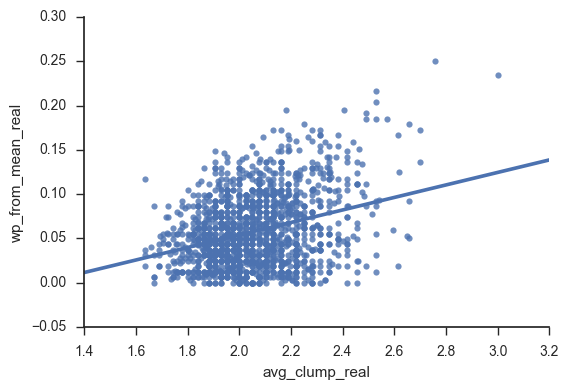

In [7]:
sns.set_style('ticks')
sns.regplot(largeDF['avg_clump_real'], largeDF['wp_from_mean_real'], ci=None)
sns.despine()

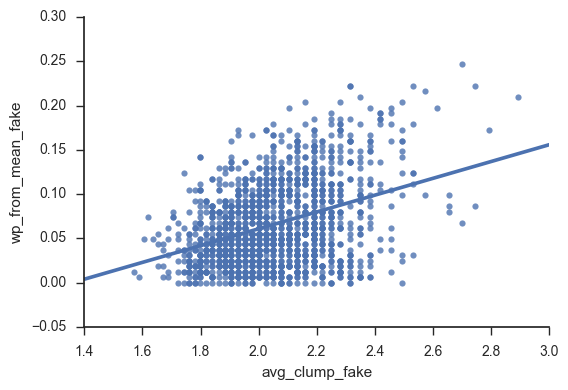

In [15]:
"Fake with 162 Games per Season"

sns.set_style('ticks')
sns.regplot(largeDF.avg_clump_fake, largeDF.wp_from_mean_fake, ci=None)
sns.despine()

In [ ]:
"Fake with 10000 Games per Season"

sns.set_style('ticks')
sns.regplot(largeDF.avg_clump_fake, largeDF.wp_from_mean_fake, ci=None)
sns.despine()

In [16]:
"P values with 162 games per seaons"

print("Welchs t test:")

print("\nAverage Clump Size Real Data:", largeDF.avg_clump_real.mean())

print("\nAverage Clump Size Randomly Created Data: ", largeDF.avg_clump_fake.mean())


t, p = ttest_ind(largeDF.avg_clump_fake, largeDF.avg_clump_real, equal_var=False)
print("")
print ("P Value =", p)


Welchs t test:

Average Clump Size Real Data: 2.059948463207338

Average Clump Size Randomly Created Data:  2.0547986691212006

P Value = 0.434715145507


In [ ]:
"P values with 10,000 games per seaons"

print("Welchs t test:")

print("\nAverage Clump Size Real Data:", largeDF.avg_clump_real.mean())

print("\nAverage Clump Size Randomly Created Data: ", largeDF.avg_clump_fake.mean())


t, p = ttest_ind(largeDF.avg_clump_fake, largeDF.avg_clump_real, equal_var=False)
print("")
print ("P Value =", p)

In [ ]:
0.017946990849999622 * 162